In [5]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

In [ ]:
# steps 
# 1.importing
# 2.visualization
# 3.data preparation
#4. training the algorithm
# making predictions
#evaluting the model

In [3]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [4]:
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.tail()
#last rows

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
df.shape
#to find the number of col and rows

(25, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
df.isnull().sum() 
#for missing values

Hours     0
Scores    0
dtype: int64

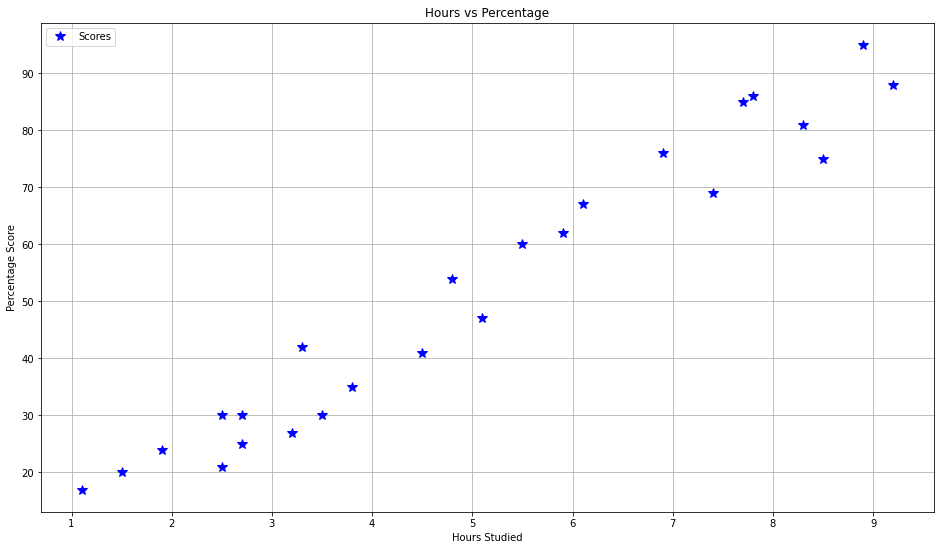

In [21]:
# step 2 visualization
plt.rcParams["figure.figsize"]=[16,9]
df.plot(x='Hours' , y='Scores' , style='*' , color='blue', markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [30]:
#we can also use .corr to determine the correlation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [31]:
#step 3 data prep
df.head()



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [35]:
#using iloc function we will divide the data
x=df.iloc[:, :1].values
y=df.iloc[:, 1:].values

In [33]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [36]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [41]:
#splitting data into training and testing data

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

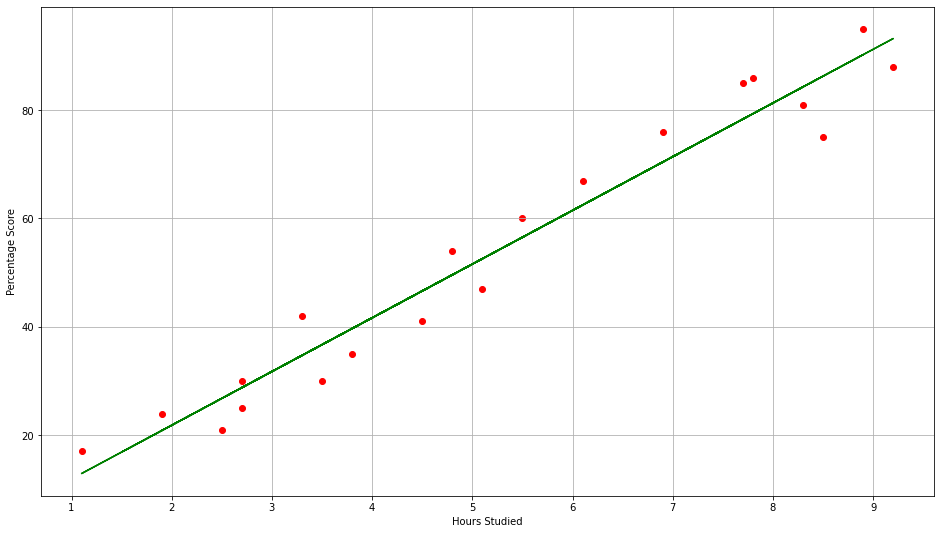

In [49]:
#step 5 visualization plotting the training data
line = model.coef_*x+model.intercept_

plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_train,y_train, color='red')
plt.plot(x, line, color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()


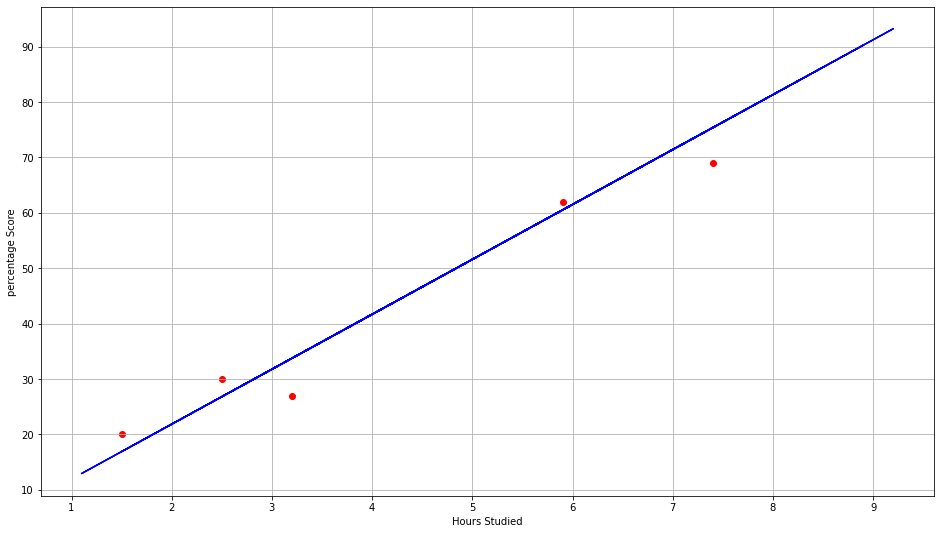

In [52]:
#plotting for testing data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_test,y_test, color='red')
plt.plot(x,line,color='blue');
plt.xlabel('Hours Studied')
plt.ylabel('percentage Score')
plt.grid()
plt.show()

In [53]:
print(X_test) #testing data -In hours
y_pred = model.predict(X_test) #predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [54]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [56]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [60]:
comp= pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [62]:
#testing with your own data

hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


In [63]:
from sklearn import metrics

print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error : 4.183859899002975
